In [1]:
# https://stumpy.readthedocs.io/en/latest/Tutorial_STUMPY_Basics.html

In [2]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [3]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


In [4]:
print(len(steam_df))

9600


In [5]:
m = 640
mp = stumpy.stump(steam_df['steam flow'], m)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [6]:
print(mp.shape)

(8961, 4)


In [7]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

The motif is located at index 643


In [8]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 8724


In [9]:
# Compute Left and Right Matrix Profiles
def compute_mp_dist(T, m, indices):
    distances = np.full(len(indices), np.inf)
    T_vals = T.values if hasattr(T, 'values') else T
    
    # Calculate the Euclidean distances for the left and right matrix profiles based on those indices
    for i, idx in enumerate(indices):
        if idx >= 0:
            Q = T_vals[i : i + m]
            S = T_vals[idx : idx + m]
            
            Q_mean = np.mean(Q)
            Q_std = np.std(Q)
            S_mean = np.mean(S)
            S_std = np.std(S)
            
            if Q_std > 0 and S_std > 0:
                Q_norm = (Q - Q_mean) / Q_std
                S_norm = (S - S_mean) / S_std
                distances[i] = np.linalg.norm(Q_norm - S_norm)
    return distances

left_indices = mp[:, 2]
right_indices = mp[:, 3]

left_mp = compute_mp_dist(steam_df['steam flow'], m, left_indices)
right_mp = compute_mp_dist(steam_df['steam flow'], m, right_indices)

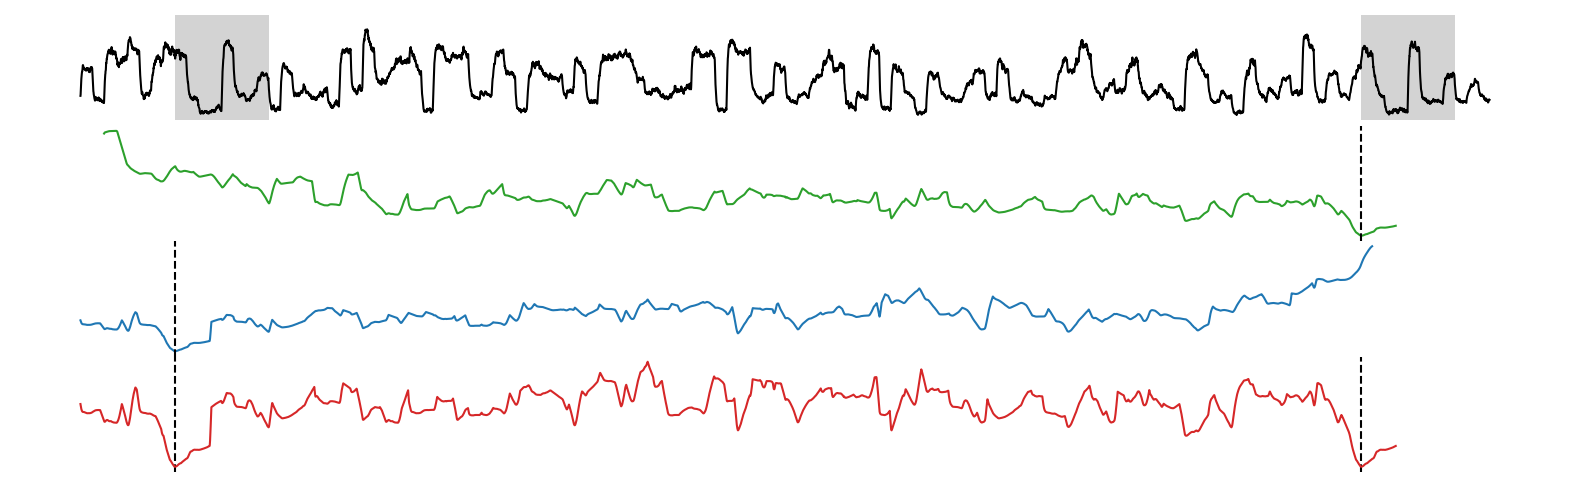

In [10]:
fig, axs = plt.subplots(4, sharex=True, gridspec_kw={'hspace': 0})
# Original time series
axs[0].axis('off')
axs[0].plot(steam_df['steam flow'].values, color='black')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
# Left matrix profile
axs[1].axis('off')
axs[1].plot(left_mp, color='tab:green')
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed", color='black')
# Right matrix profile
# axs[2].axis('off')
# axs[2].axvline(x=motif_idx, linestyle="dashed", color='black')
# axs[2].axvline(x=nearest_neighbor_idx, linestyle="dashed", color='black')
# axs[2].plot(mp[:, 0], color='tab:red')
axs[2].axis('off')
axs[2].plot(right_mp, color='tab:blue')
axs[2].axvline(x=motif_idx, linestyle="dashed", color='black')
# Matrix profile
axs[3].axis('off')
axs[3].axvline(x=motif_idx, linestyle="dashed", color='black')
axs[3].axvline(x=nearest_neighbor_idx, linestyle="dashed", color='black')
axs[3].plot(mp[:, 0], color='tab:red')
plt.savefig('../figures/visualize_matrix_profile.pdf')
plt.show()

In [11]:
import datetime

print(f"This notebook was last run end-to-end on: {datetime.datetime.now()}\n")

This notebook was last run end-to-end on: 2026-01-08 00:37:22.119347

